In [1]:
import sys
import numpy as np
import matplotlib

inputs = [1, 2, 3 , 2.5]
weights = [[0.2 , 0.8 , -0.5 , 1.0],
           [0.5 , -0.91 , 0.26 , -0.5],
           [-0.26 , -0.27 , -0.17 , 0.87]]

biases =[ 2, 3, 0.5 ]


layer_output = []

for neuron_weights , neuron_bias in zip(weights,biases):
    neuron_output = 0
    for neuron_weight , n_input in zip(neuron_weights , inputs):
        neuron_output += n_input*neuron_weight
    neuron_output  += neuron_bias
    layer_output.append(neuron_output)  
    


print("output of neurons :",layer_output)


output of neurons : [4.8, 1.21, 1.3649999999999998]


## Single neuron with numpy

In [1]:
import numpy as np


inputs = [1.0,2.0,3.0,2.5]
weights = [0.2,0.8,-0.5,1.0]
bias = 2.0


outputs = np.dot(weights , inputs) + bias

print(outputs)

4.8


In [4]:
inputs = [1.0,2.0,3.0,2.5]
weights =[ [0.2,0.8,-0.5,1.0],
          [0.5 , -0.91 , 0.26 , -0.5],
          [-0.26,-0.27 , 0.17 , 0.87]]
bias = [2.0 , 3.0 , 0.5]

layer_outputs = np.dot(weights , inputs) + bias
print(layer_outputs)


[4.8   1.21  2.385]


In [5]:
a = [ 1 , 2 , 3 ]
b = [ 2 , 3 , 4 ]

a = np.array([a])
b = np.array([b]).T

np.dot(a,b)

array([[20]])

In [7]:
#layer of neurons and batch data
inputs = [[1.0,2.0,3.0,2.5],
          [2.0 , 5.0 , -1.0 , 2.0],
          [-1.5,2.7,3.3 , -0.8]]






weights =[ [0.2,0.8,-0.5,1.0],
          [0.5 , -0.91 , 0.26 , -0.5],
          [-0.26,-0.27 , 0.17 , 0.87]]


biases = [2.0 , 3.0 , 0.5]



weights = np.array(weights).T

outputs = np.dot(inputs , weights) + bias

In [8]:
outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

## adding layers

In [11]:

inputs = [[1.0,2.0,3.0,2.5],
          [2.0 , 5.0 , -1.0 , 2.0],
          [-1.5,2.7,3.3 , -0.8]]




weights =[ [0.2,0.8,-0.5,1.0],
          [0.5 , -0.91 , 0.26 , -0.5],
          [-0.26,-0.27 , 0.17 , 0.87]]


biases = [2.0 , 3.0 , 0.5]



weights2 = [[ 0.1 , - 0.14 , 0.5 ],
            [ - 0.5 , 0.12 , - 0.33 ],
            [ - 0.44 , 0.73 , - 0.13 ]]

biases2 = [ - 1 , 2 , - 0.5 ]



layer1_outputs =  np.dot(inputs , np.array(weights).T) + biases
print("\nlayer1_outputs : \n",
      layer1_outputs)
layer2_outputs = np.dot(layer1_outputs,np.array(weights2).T) + biases2
print("\n layer2_outputs : \n",
      layer2_outputs)


layer1_outputs : 
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]

 layer2_outputs : 
 [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [12]:
!pip install nnfs


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


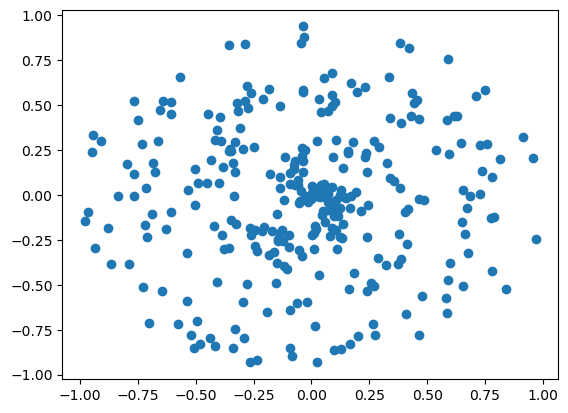

In [15]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()

%matplotlib inline
import matplotlib.pyplot as plt
X, y = spiral_data( samples = 100 , classes = 3 )
plt.scatter(X[:, 0 ], X[:, 1 ])
plt.show()

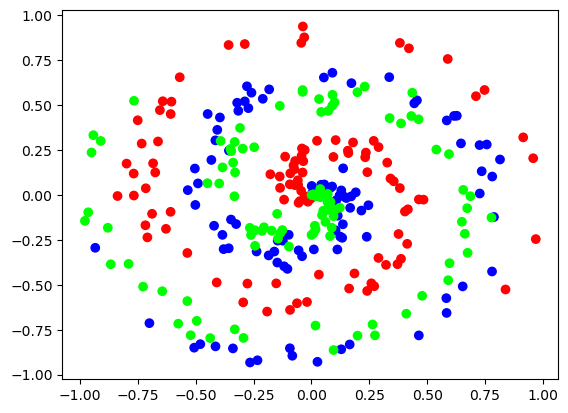

In [16]:
plt.scatter(X[:, 0 ], X[:, 1 ], c = y, cmap = 'brg' )
plt.show()

In [23]:
class Layer_dense:
    
    def __init__(self , n_inputs , n_neurons):
        #initialize the weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs , n_neurons)
        self.biases = np.zeros((1,n_neurons))
        
    
    def forward(self , inputs):
        #calculate the output  values from the input values , weights and biases
        
        self.output  = np.dot(inputs,self.weights)+self.biases
    


In [24]:
dense1 = Layer_dense(2,3)
dense1.forward()


print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-5.5361892e-05 -5.3239353e-05  1.2474808e-04]
 [-1.9669959e-04 -1.9427804e-04  2.5709232e-04]
 [-4.0703916e-04 -4.0962288e-04  2.5589613e-04]
 [-5.3941528e-04 -5.4189982e-04  3.7327429e-04]]


# activation functions

- linear activatoin function y = x
- sigmoid 
y = 1/1+e^-x
- Relu
y = x , x>0
    0 , x<=0

In [28]:
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []
for i in inputs:
    output.append( max ( 0 , i))
print (output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [29]:
output = np.maximum( 0 , inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [30]:
class Activation_ReLU:
    def forward(self , inputs):
        self.output = np.maximum(0 , inputs)


In [34]:
X, y = spiral_data( samples = 100 , classes = 3 )
dense1 = Layer_dense( 2 , 3 )
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

In [35]:
print (activation1.output[: 5 ])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.0946774e-06 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3543649e-04 0.0000000e+00 3.6163940e-05]]


In [39]:
#softmax activation function



layer_outputs = [ 4.8 , 1.21 , 2.385 ]

E = 2.718282

exp_values = []

for output in layer_outputs:
    exp_values.append(E**output)

print("expontiated values : " ,exp_values)


expontiated values :  [121.5104543255418, 3.353484908616863, 10.85906429930444]


In [41]:
# Now normalize values
norm_base = sum (exp_values) # We sum all values
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print ( 'Normalized exponentiated values:' )
print (norm_values)
print ( 'Sum of normalized values:' , sum (norm_values))

Normalized exponentiated values:
[0.8952826798854541, 0.02470830162397671, 0.08000901849056923]
Sum of normalized values: 1.0


In [42]:
import numpy as np
# Values from the earlier previous when we described
# what a neural network is
layer_outputs = [ 4.8 , 1.21 , 2.385 ]
# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print ( 'exponentiated values:' )
print (exp_values)
# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print ( 'normalized exponentiated values:' )
print (norm_values)
print ( 'sum of normalized values:' , np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


In [46]:
# Get unnormalized probabilities
exp_values = np.exp(inputs)
# Normalize them for each sample
probabilities = exp_values / np.sum(exp_values, keepdims = True)

In [49]:
inputs

[0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

In [63]:
class Activation_Softmax:
    def forward(self , inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis = 1 ,
keepdims = True )) # normalizing to prevent overflow
        
        probabilities  = exp_values/np.sum(exp_values , axis = 1, keepdims = True)
        
        self.output = probabilities
        
    

In [64]:
softmax = Activation_Softmax()
softmax.forward([[ 1 , 2 , 3 ]])
print (softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [66]:
X, y = spiral_data( samples = 100 , classes = 3 )
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_dense( 2 , 3 )
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
dense2 = Layer_dense( 3 , 3 )
activation2 = Activation_Softmax()


# forward pass

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print (activation2.output[: 5 ])

[[0.33333334 0.33333334 0.33333334]
 [0.33333382 0.33333316 0.33333305]
 [0.3333335  0.33333334 0.33333316]
 [0.3333336  0.3333333  0.33333305]
 [0.33333376 0.3333333  0.3333329 ]]


In [67]:
#entire code till now
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()


# Dense layer
class Layer_Dense :
    # Layer initialization
    def __init__ ( self , n_inputs , n_neurons ):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(( 1 , n_neurons))
    # Forward pass
    def forward ( self , inputs ):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    
    # ReLU activation
class Activation_ReLU :
    # Forward pass
    def forward ( self , inputs ):
        # Calculate output values from inputs
        self.output = np.maximum( 0 , inputs)



# Softmax activation
class Activation_Softmax :
    # Forward pass
    def forward ( self , inputs ):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis = 1 ,
        keepdims = True ))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis = 1 ,
        keepdims = True )
        self.output = probabilities


X, y = spiral_data( samples = 100 , classes = 3 )
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_dense( 2 , 3 )
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
dense2 = Layer_dense( 3 , 3 )
activation2 = Activation_Softmax()


# forward pass

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print (activation2.output[: 5 ])


[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


In [70]:
print(dense1.output)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.04751882e-04  1.13953611e-04 -4.79834998e-05]
 [-2.74148420e-04  3.17291502e-04 -8.69217984e-05]
 [-4.21883655e-04  5.26662567e-04 -5.59126820e-05]
 [-5.77076804e-04  7.14014051e-04 -8.94304394e-05]
 [-3.54306976e-04  3.50254879e-04 -2.33634812e-04]
 [-8.92670010e-04  1.07678759e-03 -1.94532375e-04]
 [-9.33507807e-04  1.07238023e-03 -3.12273973e-04]
 [-1.12437585e-03  1.31128007e-03 -3.36296740e-04]
 [-1.33869553e-03  1.62009057e-03 -2.81017943e-04]
 [-1.48779724e-03  1.79484230e-03 -3.23859538e-04]
 [-1.20035873e-03  1.58119109e-03  8.65937000e-06]
 [-1.56528328e-03  1.99173321e-03 -1.30997345e-04]
 [-1.85718178e-03  2.30642664e-03 -2.70479388e-04]
 [-1.78093580e-03  2.27836682e-03 -1.24245722e-04]
 [-1.85300526e-03  2.38476763e-03 -1.00471654e-04]
 [-6.99865050e-04  1.11472746e-03  3.96097894e-04]
 [-2.19024252e-03  2.79446482e-03 -1.68075712e-04]
 [-1.69829139e-03  2.29598465e-03  1.31671681e-04]
 [-2.60229013e-03  3.27291898e-

In [68]:
#calculating Network Error Loss

import math


# An example output from the output layer of the neural network
softmax_output = [ 0.7 , 0.1 , 0.2 ]
# Ground truth
target_output = [ 1 , 0 , 0 ]


loss = -(math.log(softmax_output[0])*target_output[0]+
         math.log(softmax_output[1])*target_output[1]+
         math.log(softmax_output[2])*target_output[2]
        )
print(loss)

0.35667494393873245


In [72]:
softmax_outputs = [[ 0.7 , 0.1 , 0.2 ],
[ 0.1 , 0.5 , 0.4 ],
[ 0.02 , 0.9 , 0.08 ]]
class_targets = [ 0 , 1 , 1 ]
for targ_idx, distribution in zip (class_targets, softmax_outputs):
    print (distribution[targ_idx])

0.7
0.5
0.9


In [74]:
softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
[ 0.1 , 0.5 , 0.4 ],
[ 0.02 , 0.9 , 0.08 ]])
class_targets = [ 0 , 1 , 1 ]
print (softmax_outputs[[ 0 , 1 , 2 ], class_targets])

[0.7 0.5 0.9]


In [75]:
print(softmax_outputs[
    range(len(softmax_outputs)) , class_targets
])


[0.7 0.5 0.9]


In [81]:
neg_log = -np.log(softmax_outputs[
    range(len(softmax_outputs)) , class_targets
])
print(neg_log)

[0.35667494 0.69314718 0.10536052]


In [82]:
average_loss = np.mean(neg_log)
print (average_loss)

0.38506088005216804


In [89]:
import numpy as np
softmax_outputs = np.array([[ 0.7 , 0.1 , 0.2 ],
[ 0.1 , 0.5 , 0.4 ],
[ 0.02 , 0.9 , 0.08 ]])
class_targets = np.array([[ 1 , 0 , 0 ],
[ 0 , 1 , 0 ],
[ 0 , 1 , 0 ]])
# Probabilities for target values -
# only if categorical labels
if len (class_targets.shape) == 1 :
    correct_confidences = softmax_outputs[
    range ( len (softmax_outputs)),
    class_targets
    ]
elif len(class_targets.shape) == 2 :
    print("2")
    correct_confidences = np.sum(
    softmax_outputs * class_targets,
    axis = 1
    )
    
neg_log = - np.log(correct_confidences)
average_loss = np.mean(neg_log)
print (average_loss)

2
0.38506088005216804


In [87]:
correct_confidences

array([0.7, 0.5, 0.9])

In [101]:
class Loss:
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        
        return data_loss
    
    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self , y_pred,y_true):
        samples = len(y_pred)
        
        y_pred_clipped = np.clip(y_pred , 1e-7,1-1e-7)
        
        if len(y_true.shape)==1:
            correct_confidence = y_pred_clipped[
                range(samples) , y_true
            ]
    
        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(
            y_pred_clipped*y_true,
            axis = 1
            )
            
        negative_log_likelihood = -np.log(correct_confidence)
        return negative_log_likelihood

In [102]:
loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print (loss)

0.38506088005216804


In [14]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data


class Layer_Dense:
    def __init__(self,n_inputs , n_neurons):
        
        #initialize the weights
        
        self.weights = 0.01*np.random.randn(n_inputs , n_neurons)
        
        self.biases = np.zeros((1,n_neurons))
        
    def forward(self , inputs):
        
        self.output = np.dot(inputs , self.weights ) + self.biases
        
class Activation_ReLu:
    def forward(self , inputs):
        self.output = np.maximum(0,inputs)
        
class Activation_Softmax:
    
    def forward(self , inputs):
        
        exp_values = np.exp(inputs - np.max(inputs , axis = 1 , keepdims = True))
        
        probabilities = exp_values / np.sum(exp_values , axis = 1, keepdims = True)
        
        self.output = probabilities
        
class Loss:
    def calculate(self , output , y):
        
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss
        

class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self , y_pred , y_true):
        
        
#         print("y_pred.shape",y_pred.shape)
#         print("y_pred :",y_pred)
        
        samples = len(y_pred)
        print("samples :",samples)
        
        y_pred_clipped = np.clip(y_pred , 1e-7 , 1- 1e-7)
        

        
#         print("y_pred_clipped.shape",y_pred_clipped.shape)        
#         print("y_pred_clipped :",y_pred_clipped)

        
#         print("y_true.shape",y_true.shape)
#         print("y_true :",y_true)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples) , y_true
            ]
        elif len(y_true.shape) == 2:
            
            correct_confidences = np.sum(y_pred_clipped * y_true ,
                                       axis = 1
                                       )
        
        
        negative_log_likelihood = -np.log(correct_confidences)
        return negative_log_likelihood
    

   

In [15]:
 
X , y = spiral_data(samples = 100 , classes = 3)
print("X shape ",X.shape)


X shape  (300, 2)


In [16]:
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )


# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLu()


# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense( 3 , 3 )


# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()


# Create loss function
loss_function = Loss_CategoricalCrossEntropy()



In [17]:
# Perform a forward pass of our training data through this layer
dense1.forward(X)     
# print("dense1.output shape :",dense1.output.shape)
# print("dense1.output :",dense1.output)
activation1.forward(dense1.output)



# print("activation1.output shape :",activation1.output.shape)
# print("activation1.output :",activation1.output)


dense2.forward(activation1.output)

# print("dense2.output shape :",dense2.output.shape)
# print("dense2.output :",dense2.output)



# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)


# print("activation2.output shape :",activation2.output.shape)
# print("activation2.output :",activation2.output)


# Let's see output of the first few samples:
print (activation2.output[: 5 ])


# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)


# Print loss value
print ( 'loss:' , loss)

[[0.33333333 0.33333333 0.33333333]
 [0.33333318 0.33333389 0.33333293]
 [0.33333339 0.33333409 0.33333252]
 [0.33333354 0.33333485 0.33333161]
 [0.33333261 0.33333554 0.33333185]]
samples : 300
loss: 1.0986068244382226


In [18]:
#accuracy calculation


In [19]:
import numpy as np
# Probabilities of 3 samples
softmax_outputs = np.array([[ 0.7 , 0.2 , 0.1 ],
[ 0.5 , 0.1 , 0.4 ],
[ 0.02 , 0.9 , 0.08 ]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([ 0 , 1 , 1 ])

In [21]:
class_targets = np.array([ 0 , 1 , 1 ])
# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis = 1 )
# If targets are one-hot encoded - convert them
if len (class_targets.shape) == 2 :
    class_targets = np.argmax(class_targets, axis = 1 )
# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print ( 'acc:' , accuracy)

acc: 0.6666666666666666


In [23]:
predictions = np.argmax(activation2.output , axis = 1)

if len(y.shape) == 2:
    
    y = np.argmax(y , axis = 1)
accuracy = np.mean(predictions == y)

In [24]:

print(accuracy)

0.36


In [35]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data


class Layer_Dense:
    def __init__(self,n_inputs , n_neurons):
        
        #initialize the weights
        
        self.weights = 0.01*np.random.randn(n_inputs , n_neurons)
        
        self.biases = np.zeros((1,n_neurons))
        
    def forward(self , inputs):
        
        self.output = np.dot(inputs , self.weights ) + self.biases
        
class Activation_ReLu:
    def forward(self , inputs):
        self.output = np.maximum(0,inputs)
        
class Activation_Softmax:
    
    def forward(self , inputs):
        
        exp_values = np.exp(inputs - np.max(inputs , axis = 1 , keepdims = True))
        
        probabilities = exp_values / np.sum(exp_values , axis = 1, keepdims = True)
        
        self.output = probabilities
        
class Loss:
    def calculate(self , output , y):
        
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        
        return data_loss
        

class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self , y_pred , y_true):
        
        
#         print("y_pred.shape",y_pred.shape)
#         print("y_pred :",y_pred)
        
        samples = len(y_pred)
        
        y_pred_clipped = np.clip(y_pred , 1e-7 , 1- 1e-7)
        

        
#         print("y_pred_clipped.shape",y_pred_clipped.shape)        
#         print("y_pred_clipped :",y_pred_clipped)

        
#         print("y_true.shape",y_true.shape)
#         print("y_true :",y_true)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples) , y_true
            ]
        elif len(y_true.shape) == 2:
            
            correct_confidences = np.sum(y_pred_clipped * y_true ,
                                       axis = 1
                                       )
        
        
        negative_log_likelihood = -np.log(correct_confidences)
        return negative_log_likelihood
    

    
X , y = spiral_data(samples = 100 , classes = 3)
print("X shape ",X.shape)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )


# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLu()


# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense( 3 , 3 )


# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()


# Create loss function
loss_function = Loss_CategoricalCrossEntropy()




# Perform a forward pass of our training data through this layer
dense1.forward(X)     
# print("dense1.output shape :",dense1.output.shape)
# print("dense1.output :",dense1.output)
activation1.forward(dense1.output)



# print("activation1.output shape :",activation1.output.shape)
# print("activation1.output :",activation1.output)


dense2.forward(activation1.output)

# print("dense2.output shape :",dense2.output.shape)
# print("dense2.output :",dense2.output)



# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)


# print("activation2.output shape :",activation2.output.shape)
# print("activation2.output :",activation2.output)


# Let's see output of the first few samples:
print (activation2.output[: 5 ])


# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)


# Print loss value
print ( 'loss:' , loss)

predictions = np.argmax(activation2.output , axis = 1)

if len(y.shape) == 2:
    
    y = np.argmax(y , axis = 1)
accuracy = np.mean(predictions == y)
print('accuracy : ',accuracy)

X shape  (300, 2)
[[0.33333334 0.33333334 0.33333334]
 [0.3333338  0.33333316 0.33333308]
 [0.33333483 0.33333278 0.3333324 ]
 [0.3333348  0.33333272 0.3333325 ]
 [0.333334   0.33333296 0.33333302]]
loss: 1.0986118
accuracy :  0.38333333333333336


## introducing optimization

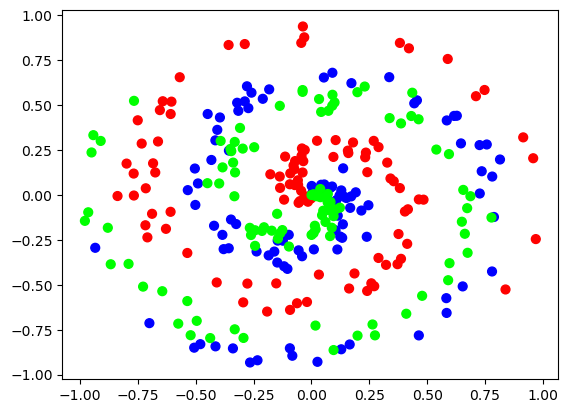

In [43]:
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
import matplotlib.pyplot as plt 

%matplotlib inline

nnfs.init()


X, y = spiral_data( samples = 100 , classes = 3 )
plt.scatter(X[:,0],X[:,1],c = y , s = 40 , cmap = 'brg')
plt.show()



In [44]:
dense1 = Layer_Dense(2,3)
activaton1 = Activation_ReLu()

dense2 = Layer_Dense(3,3)
activaton2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossEntropy()

In [45]:
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [46]:

for iteration in range(10000):
    best_dense1_weights = 0.05*np.random.randn(2,3)
    best_dense1_biases = 0.05*np.random.randn(1,3)
    best_dense2_weights = 0.05*np.random.randn(3,3)
    best_dense2_biases = 0.05*np.random.randn(1,3)
    
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    
    dense2.forward(activation2.output)
    activation2.forward(dense2.output)
    loss = loss_function.calculate(activation2.output, y)

    
    predictions = np.argmax(activation2.output, axis = 1 )
    accuracy = np.mean(predictions == y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print ( 'New set of weights found, iteration:' , iteration,
        'loss:' , loss, 'acc:' , accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else :
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.09863 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0986283 acc: 0.3333333333333333
New set of weights found, iteration: 59 loss: 1.0986179 acc: 0.3333333333333333
New set of weights found, iteration: 61 loss: 1.0986176 acc: 0.3333333333333333
New set of weights found, iteration: 456 loss: 1.0986155 acc: 0.3333333333333333
New set of weights found, iteration: 457 loss: 1.0986152 acc: 0.3333333333333333
New set of weights found, iteration: 697 loss: 1.0986133 acc: 0.3333333333333333
New set of weights found, iteration: 3964 loss: 1.098613 acc: 0.3333333333333333
New set of weights found, iteration: 3965 loss: 1.0986124 acc: 0.3333333333333333


#### derivatives






In [51]:
import matplotlib.pyplot as plt 
import numpy as np


(2, 8) (2.0001, 8.000800020000002)


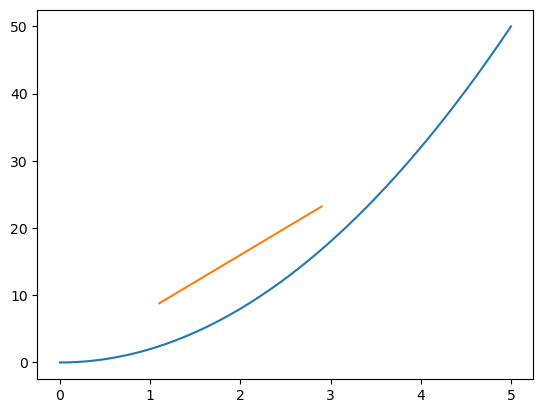

approximate derivative for f(x) where x = 2 is 8.000199999998785


In [54]:


def f(x):
    return 2*x**2

x = np.arange(0,5,0.001)
y = f(x)

plt.plot(x,y)
p2_delta = 0.0001


x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)



print((x1, y1), (x2, y2))

approximate_derivative = (y2-y1)/(x2-x1)


b = y2-approximate_derivative*x2



def tangent_line(x):

    return approximate_derivative*x


to_plot = [x1 -0.9 , x1 , x1+0.9]
plt.plot(to_plot , [tangent_line(i) for i in to_plot])
plt.show()

print('approximate derivative for f(x)',
     f'where x = {x1} is {approximate_derivative}')



(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998 
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845 
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785 
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785 
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548 


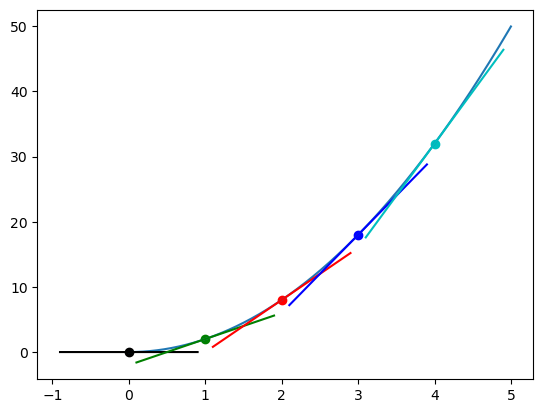

In [56]:
plt.plot(x, y)
colors = [ 'k' , 'g' , 'r' , 'b' , 'c' ]
def approximate_tangent_line ( x , approximate_derivative ):
    return (approximate_derivative * x) + b

for i in range ( 5 ):
    p2_delta = 0.0001
    x1 = i
    x2 = x1 + p2_delta
    y1 = f(x1)
    y2 = f(x2)
    print ((x1, y1), (x2, y2))
    approximate_derivative = (y2 - y1) / (x2 - x1)
    b = y2 - (approximate_derivative * x2)
    to_plot = [x1 - 0.9 , x1, x1 + 0.9 ]
    plt.scatter(x1, y1, c = colors[i])
    plt.plot([point for point in to_plot],
    [approximate_tangent_line(point, approximate_derivative)
    for point in to_plot],
    c = colors[i])
    print ( 'Approximate derivative for f(x)' ,
    f'where x = {x1} is {approximate_derivative} ' )
plt.show()

### Gradients, Partial Derivatives,and the Chain Rule